# Lab_1



In [ ]:
from  sklearn   import  datasets

In [ ]:
iris=datasets.load_iris()

In [33]:
import  pandas as pd
import numpy as np

In [37]:
drinks=pd.read_csv("http://bit.ly/drinksbycountry")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [38]:
drinks.beer_servings.mean()

106.16062176165804

In [42]:
drinks[drinks.country=="Bahrain"].beer_servings.mean()

42.0

In [39]:
drinks.groupby("continent").beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [41]:
drinks[drinks.continent=="Africa"].beer_servings.mean()

61.471698113207545

In [44]:
drinks.groupby("continent").beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [50]:
drinks.groupby("continent").beer_servings.agg(["count", "mean", "min", "max"])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


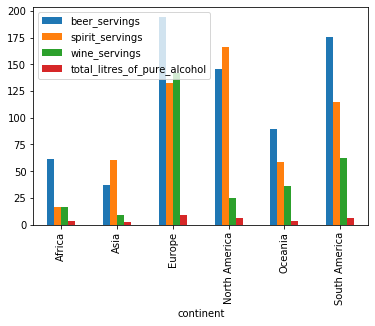

In [52]:
drinks.groupby("continent").mean().plot(kind="bar")

In [35]:
{'predictions': [{'score': 0.004625876434147358, 'predicted_label': 0.0}]}


'/Users/medamin/_Projets/_DataScience/AWS_sageMaker/Lab_1'

In [36]:
df = pd.DataFrame([('Adel', "Subj1", 3.50  ,2.57),
                   ('Adel', "Subj2", 2.75  ,3.6  ),
                   
                   ('Alexa',"Subj1", 1.75  ,3.25) ,
                   ('Alexa',"Subj3", 3.15  ,2.25) ], 
                  columns=('Name', "Subj","Mid", "Ach" ))
df

,Name,Subj,Mid,Ach
0,Adel,Subj1,3.50,2.57
1,Adel,Subj2,2.75,3.60
2,Alexa,Subj1,1.75,3.25
3,Alexa,Subj3,3.15,2.25


In [38]:
df2=df.pivot(index="Name", columns="Subj", values=["Mid", "Ach"]).swaplevel(0,1, axis=1)
#flatten index - I assumed that's what you're going for:
df2.columns=["_".join(el) for el in df2.columns] 
df2.head()
df2.to_csv("")

,Subj1_Mid,Subj2_Mid,Subj3_Mid,Subj1_Ach,Subj2_Ach,Subj3_Ach
Name,,,,,,
Adel,3.50,2.75,NaN,2.57,3.6,NaN
Alexa,1.75,NaN,3.15,3.25,NaN,2.25


In [30]:
df = pd.DataFrame([('Adel',  3.50,2.75 , np.nan, 2.57,3.6, ),
                   ('Alexa', 1.75  ,np.nan   ,  3.15 , 3.25  ,np.nan, 2.25) ], 
                  columns=('Name', "Subj1_Mid","Subj2_Mid","Subj3_Mid", "Subj1_Ach","Subj2_Ach","Subj3_Ach" ))
df

,Name,Subj1_Mid,Subj2_Mid,Subj3_Mid,Subj1_Ach,Subj2_Ach,Subj3_Ach
0,Adel,3.50,2.75,NaN,2.57,3.6,NaN
1,Alexa,1.75,NaN,3.15,3.25,NaN,2.25


In [14]:
df = pd.DataFrame([('Adel', "Subj1", 3.50  ,2.57 , 3.25),
                   ('Adel', "Subj2", 2.75  ,3.6  , 3.1 ),
                   ('Adel', "Subj3", 2.10  ,4.75 , 3.15),
                   ('Alexa',"Subj1", 1.75  ,3.25 , 3.5),
                   ('Alexa',"Subj2", 3.15  ,3.25,  2.5),
                   ('Alexa',"Subj4", 3.15  ,2.25 , 3.1)], 
                  columns=('Name', "Sbj1","Med", "Achievement" ,  'GPA'))
df

,Name,Sbj1,Med,Achievement,GPA
0,Adel,Subj1,3.50,2.57,3.25
1,Adel,Subj2,2.75,3.60,3.10
2,Adel,Subj3,2.10,4.75,3.15
3,Alexa,Subj1,1.75,3.25,3.50
4,Alexa,Subj2,3.15,3.25,2.50
5,Alexa,Subj4,3.15,2.25,3.10


In [81]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df.sort_values("A", inplace=True, ascending=True)
df

,A,B,C,D,E
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6


In [131]:
gpb=df.groupby('A')
gpb["D"].agg([np.sum, np.std, np.mean, np.median])

,sum,std,mean,median
A,,,,
bar,22,1.290994,5.5,5.5
foo,11,0.836660,2.2,2.0


In [16]:
import pandas as pd
import numpy as np

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'Kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)
df.head()


,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741


In [17]:
df.sort_values("Team", ascending=True)

,Team,Rank,Year,Points
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
0,Riders,1,2014,876
1,Riders,2,2015,789
8,Riders,2,2016,694
11,Riders,2,2017,690


In [18]:
df.groupby('Team')["Points"]
print(df.groupby('Team').apply(lambda x: np.max(x[['Points']])))

        Points
Team          
Devils     863
Kings      812
Riders     876
Royals     804


In [19]:
df.groupby('Team')["Points"]
print(df.groupby('Team').apply(lambda x: x[['Points']].max()))

        Points
Team          
Devils     863
Kings      812
Riders     876
Royals     804


In [20]:
gp=df.groupby('Team')
for  a, b in gp:
    print(a)
    print(b)

Devils
     Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673
Kings
    Team  Rank  Year  Points
4  Kings     3  2014     741
5  Kings     4  2015     812
6  Kings     1  2016     756
7  Kings     1  2017     788
Riders
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690
Royals
      Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804


In [21]:
gp.get_group("Riders")

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
8,Riders,2,2016,694
11,Riders,2,2017,690


In [22]:
df.Team.unique()

array(['Riders', 'Devils', 'Kings', 'Royals'], dtype=object)

In [28]:
gp.max()

,Rank,Year,Points
Team,,,
Devils,3,2015,863
Kings,4,2017,812
Riders,2,2017,876
Royals,4,2015,804


In [30]:
gp.describe()

Rank                                             Year          ...  \
       count  mean       std  min   25%  50%   75%  max count    mean  ...   
Team                                                                   ...   
Devils   2.0  2.50  0.707107  2.0  2.25  2.5  2.75  3.0   2.0  2014.5  ...   
Kings    4.0  2.25  1.500000  1.0  1.00  2.0  3.25  4.0   4.0  2015.5  ...   
Riders   4.0  1.75  0.500000  1.0  1.75  2.0  2.00  2.0   4.0  2015.5  ...   
Royals   2.0  2.50  2.121320  1.0  1.75  2.5  3.25  4.0   2.0  2014.5  ...   

                        Points                                            \
            75%     max  count    mean         std    min     25%    50%   
Team                                                                       
Devils  2014.75  2015.0    2.0  768.00  134.350288  673.0  720.50  768.0   
Kings   2016.25  2017.0    4.0  774.25   31.899582  741.0  752.25  772.0   
Riders  2016.25  2017.0    4.0  762.25   88.567771  690.0  693.00  741.5   
Royals  2014.75  2015.0    2.0  752.50   72.831998  701.0  726.75  752.5   

                       
           75%    max  
Team                   
Devils  815.50  863.0  
Kings   794.00  812.0  
Riders  810.75  876.0  
Royals  778.25  804.0  

[4 rows x 24 columns]

Team
Devils    AxesSubplot(0.125,0.125;0.775x0.755)
Kings     AxesSubplot(0.125,0.125;0.775x0.755)
Riders    AxesSubplot(0.125,0.125;0.775x0.755)
Royals    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

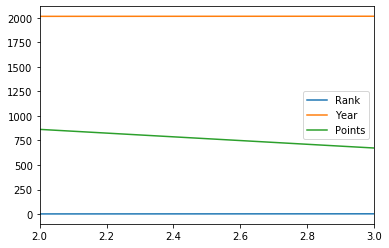

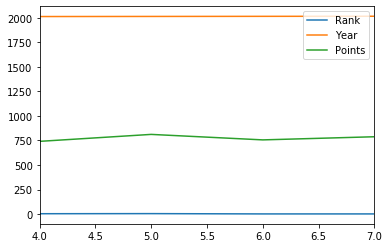

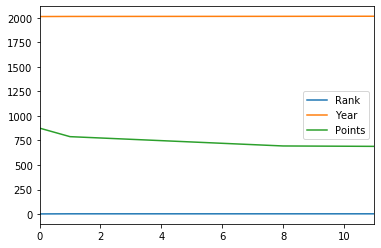

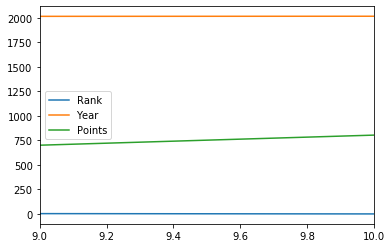

In [32]:
%matplotlib inline
gp.plot()

In [170]:
def get_max_rows(df ):
    B_maxes = df.groupby("Team").Rank.transform(max)
    return df[df.Points == B_maxes] 
print(get_max_rows(df))

      Team  Rank  Year  Points
0   Riders     1  2014     876
2   Devils     2  2014     863
5    kings     4  2015     812
7    Kings     1  2017     788
10  Royals     1  2015     804


In [171]:
def get_max_rows(df ):
    B_maxes = df.groupby("Team").Rank.transform(max)
    return df[df.Rank == B_maxes] 
print(get_max_rows(df))

      Team  Rank  Year  Points
1   Riders     2  2015     789
3   Devils     3  2015     673
4    Kings     3  2014     741
5    kings     4  2015     812
8   Riders     2  2016     694
9   Royals     4  2014     701
11  Riders     2  2017     690


In [13]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                     columns=['C'], aggfunc=np.sum)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [65]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar'],
                   'B' : [1, 2, 3, 4, 5, 6],
                   'C' : [2.0, 5., 8., 1., 2., 9.]})
df.

,A,B,C
0,foo,1,2.0
1,bar,2,5.0
2,foo,3,8.0
3,bar,4,1.0
4,foo,5,2.0
5,bar,6,9.0


In [64]:
grouped = df.groupby('A')
grouped.filter(lambda x: x['B'].mean() > 3.)

,A,B,C
1,bar,2,5.0
3,bar,4,1.0
5,bar,6,9.0


# CAse Study 

In [5]:

from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
boston.data.shape

(506, 13)

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
boston.filename

'/Users/anaconda3/lib/python3.7/site-packages/sklearn/datasets/data/boston_house_prices.csv'

In [27]:
boston.data[0:4,:4]


array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00],
       [2.731e-02, 0.000e+00, 7.070e+00, 0.000e+00],
       [2.729e-02, 0.000e+00, 7.070e+00, 0.000e+00],
       [3.237e-02, 0.000e+00, 2.180e+00, 0.000e+00]])

In [23]:
boston.target[0:4:,0]

IndexError: too many indices for array

In [7]:
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [29]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [30]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
data['PRICE'] = boston.target

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [35]:
# target columns 
data.iloc[:,-1]


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [36]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [37]:
import xgboost as xgb

In [71]:
#warnings.simplefilter(action='ignore', category=FutureWarning)
data_dmatrix = xgb.DMatrix(data=X,label=y)

_convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. You will use this later in the tutorial.

In [72]:
data_dmatrix

# XGBoost's hyperparameters
-learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- max_depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
- n_estimators: number of trees you want to build.
- objective: determines the loss function to be used like 
        reg:linear for regression problems, 
        reg:logistic for classification problems with only decision, 
        binary:logistic for classification problems with probability.
        

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.
- gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- alpha: L1 regularization on leaf weights. A large value leads to more regularization.
- lambda: L2 regularization on leaf weights and is smoother than L1 regularization.
It's also worth mentioning that though you are using trees as your base learners, you can also use XGBoost's relatively less popular linear base learners and one other tree learner known as dart. All you have to do is set the booster parameter to either gbtree (default),gblinear or dart.

In [73]:
# train and test set for cross-validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [74]:
# instantiate an XGBoost regressor object 
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [75]:
# Fit the regressor to the training set and make predictions on the test set
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [76]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.397587


# k-fold Cross Validation using XGBoost
### Parameters to set:
- num_boost_round: denotes the number of trees you build (analogous to n_estimators)
- metrics: tells the evaluation metrics to be watched during CV
- as_pandas: to return the results in a pandas DataFrame.
- early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
- seed: for reproducibility of results.

In [48]:
# reate a hyper-parameter dictionary params
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [49]:
# build a 3-fold cross validation model by invoking XGBoost's cv() method 
# and store the results in a cv_results DataFrame
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


In [50]:
xgb.__version__

'0.90'

In [51]:
# train and test RMSE metrics for each boosting round.
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.680255,0.025604,21.719119,0.019027
1,19.740498,0.072069,19.818879,0.061769
2,18.007202,0.119743,18.109863,0.129374
3,16.463924,0.115088,16.587236,0.182337
4,14.990312,0.112000,15.132977,0.166282


In [52]:
# print the final boosting round metric
(cv_results["test-rmse-mean"]).tail(1)

49    3.862102
Name: test-rmse-mean, dtype: float64

- You can see that your RMSE for the price prediction has reduced as compared to last time and came out to be around 4.03 per 1000$. You can reach an even lower RMSE for a different set of hyper-parameters. You may consider applying techniques like Grid Search, Random Search and Bayesian Optimization to reach the optimal set of hyper-parameters.

# Visualize Boosting Trees and Feature Importance



In [53]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


- Plotting the first tree with the matplotlib library:


In [60]:
!brew install graphviz

Updating Homebrew...
To reinstall 2.42.2, run `brew reinstall graphviz`


 import matplotlib.pyplot as plt



In [54]:
import matplotlib as plt

In [55]:

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
#plt.show()

_Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

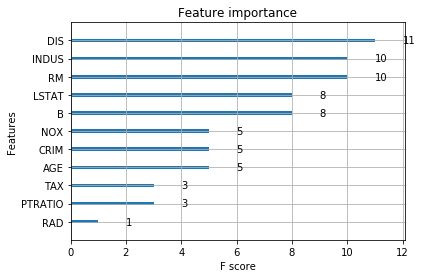

In [56]:

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
#plt.show()

# Lab_2

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


from xgboost import XGBClassifier
import xgboost as xgb

XGboost natively uses a specific format, that is optimized in term of memory and computation speed : DMatrix. When using numpy, you have to convert it explicitely.

In [58]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


The major parameters are as following - we will focus on the parameters later on.

In [59]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # Learning rate, the training step for each iteration
    'silent': 1,  # logging mode - quieter and faster
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this dataset
num_round = 20  # the number of training iterations


Finally, we run the training and prediction with an api that is similar to sklearn - though we have to the true prediction : for each line, we must select the class where the probability is the highest.

In [62]:
%%timeit

bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
predictions = np.asarray([np.argmax(line) for line in preds])
#print (precision_score(y_test, predictions, average='macro')) # 1.0

5.83 ms ± 279 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



With a bit less performance, you can also directly use the pandas-compatible functions that mirror exactly the sklearn api.

In [48]:
df=pd.read_csv("https://bit.ly/2RYE2hI")

In [49]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [50]:
df['Species']=df.variety

In [55]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,Species
0,5.1,3.5,1.4,0.2,Setosa,Setosa+
1,4.9,3.0,1.4,0.2,Setosa,Setosa
2,4.7,3.2,1.3,0.2,Setosa,Setosa
3,4.6,3.1,1.5,0.2,Setosa,Setosa
4,5.0,3.6,1.4,0.2,Setosa,Setosa


In [54]:
df.Species[0]="Setosa+"

/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df_factor = df.select_dtypes(exclude=[np.number]).columns

In [57]:
print(df_factor)

Index(['variety', 'Species'], dtype='object')


In [58]:
df.Species.unique()

array(['Setosa+', 'Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [59]:
df[df_factor].head()

,variety,Species
0,Setosa,Setosa+
1,Setosa,Setosa
2,Setosa,Setosa
3,Setosa,Setosa
4,Setosa,Setosa


In [60]:
from sklearn import preprocessing

In [61]:
label_encoder=preprocessing.LabelEncoder()

In [62]:
for i in df_factor:
    print(i)

variety
Species


In [63]:
for i in df_factor:

    df[i] = label_encoder.fit_transform(df[i])

print("Label Encoded Data: ")

df.head()

Label Encoded Data: 


,sepal.length,sepal.width,petal.length,petal.width,variety,Species
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [26]:
df.variety.unique()

array([0, 1, 2])

In [69]:
(df.Species.unique())

4

$$\large \text {Exemple d'application de Micropython pour controller  un Servo }$$

In [ ]:
# Pour un servo qui fonctionne sous 50Hz , sa charge devra être située entre 40 et 115 ave cune médiane de 77.
servo=PMM(Pin(14), freq=50)

In [ ]:
#Poisiiton minimale (angle 0)
servo.duty(40)

In [ ]:
#Position maximale (angle 180)
servo.duty(115)

In [ ]:
#positin médiane 
servo.duty(77)

In [ ]:
step=2
for i in range(40, 115, step):
	servo.duty(i)
	sleep(0.1)
step==-step
fro i in range (115, 40, sep)
	servo.duty(i)
	sleep(0.1)
servo.duty(77)

In [15]:
# connection au micro-controlleur ESP32
%serialconnect --port==/dev/ttyUSB0   --baud=115200

Connected to --port=/dev/ttyUSB0 --baud=115200
Ready


In [8]:
# connection au micro-controlleur ESP32
%serialconnect --port==/dev/ttyUSB0   --baud=115200

Connected to — port =—port=/dev/ttyUSB0 —baud=115200
Ready


In [ ]:
# chargement des libraries necessaires
import dht
import machine
import utime

In [ ]:
# lecture de données sur le point de contact 1
d = dht.DHT11(machine.Pin(1))
temp= []
hum = []
for i in range(0,10):
    d.measure()
    temp.append(d.temp())
    hum.append(d.hum())
    utime.sleep_ms(1000)

In [9]:
# Afichage des données
print(temp)
print(hum)

[23, 22, 22, 22, 23, 23, 24, 24, 24, 24]
[60, 37, 37, 38, 38, 38, 39, 39, 40, 42]
